<a href="https://colab.research.google.com/github/Orangefox76200/EMD-Capsule-LSTM/blob/main/EMD_Capsule_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EMD-Capsule-LSTM with Attention Mechanism**

## Install and import packages

Install pyEMD (EMD-signal 1.2.3)

In [2]:
!pip install EMD-signal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.5 MB/s 
     |████████████████████████████████| 76 kB 6.0 MB/s 
     |████████████████████████████████| 52 kB 1.3 MB/s 
     |████████████████████████████████| 115 kB 59.8 MB/s 


In [3]:
!pip install keras-utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for keras-utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=5078e353f528f931c4d0b09cffc75984e1c1b48deb362399039045d5c8c28d84
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras-utils


In [4]:
#!pip list

Import Packages

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from PyEMD import EMD , Visualisation
from PyEMD import EEMD
from PyEMD import CEEMDAN
from matplotlib import pyplot as plt

## Select the time series from raw data

Stock Index Dataset: DJIA (Jan 04,2010-Dec 31,2019)

Upload **Orangefox76200/EMD-Capsule-LSTM/DJIA.xlsx** (Github) to Google Drive, then import it from Google Drive to EMD_Capsule_LSTM.ipynb

In [6]:
from google.colab import drive
drive.mount ('gdrive')
DJIA_raw = pd.read_excel ('gdrive/MyDrive/Colab Notebooks/DJIA.xlsx')
DJIA_raw

Mounted at gdrive


,Date,Open,High,Low,Close,Volume
0,"Jan 04, 2010",10430.69,10604.97,10430.69,10583.96,179780000
1,"Jan 05, 2010",10584.56,10584.56,10522.52,10572.02,188540000
2,"Jan 06, 2010",10564.72,10594.99,10546.55,10573.68,186040000
3,"Jan 07, 2010",10571.11,10612.37,10505.21,10606.86,217390000
4,"Jan 08, 2010",10606.40,10619.40,10554.33,10618.19,172710000
...,...,...,...,...,...,...
2511,"Dec 24, 2019",28572.57,28576.80,28503.21,28515.45,86150000
2512,"Dec 26, 2019",28539.46,28624.10,28535.15,28621.39,155970000
2513,"Dec 27, 2019",28675.34,28701.66,28608.98,28645.26,182280000
2514,"Dec 30, 2019",28654.76,28664.69,28428.98,28462.14,181600000


In [7]:
DJIA_raw.shape

(2516, 6)

In [8]:
DJIA_raw.ndim

2

In [9]:
DJIA_raw.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [10]:
DJIA_raw.describe()

,Open,High,Low,Close,Volume
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,17601.997731,17686.674499,17513.448593,17606.741574,1.895687e+08
std,5148.425951,5162.804510,5131.962418,5147.050108,1.106612e+08
min,9686.480000,9770.870000,9614.320000,9686.480000,8.410000e+06
25%,12977.190000,13044.985000,12921.337500,12981.207500,1.028275e+08
50%,17011.075000,17081.805000,16943.140000,17008.230000,1.516350e+08
75%,21426.617500,21488.690000,21383.437500,21411.107500,2.602025e+08
max,28675.340000,28701.660000,28608.980000,28645.260000,9.005100e+08


In [11]:
DJIA_raw.iloc[:,4]

0       10583.96
1       10572.02
2       10573.68
3       10606.86
4       10618.19
          ...   
2511    28515.45
2512    28621.39
2513    28645.26
2514    28462.14
2515    28538.44
Name: Close, Length: 2516, dtype: float64

Use the close price as the time series to be predicted.

In [12]:
DJIA_timeseries = DJIA_raw.iloc[:,4]
DJIA_timeseries.shape

(2516,)

In [13]:
DJIA_timeseries.ndim

1

In [14]:
DJIA_timeseries.iloc[:]

0       10583.96
1       10572.02
2       10573.68
3       10606.86
4       10618.19
          ...   
2511    28515.45
2512    28621.39
2513    28645.26
2514    28462.14
2515    28538.44
Name: Close, Length: 2516, dtype: float64

Convert Pandas series to Numpy Array

In [15]:
DJIA_timeseries_array = DJIA_timeseries.to_numpy()
DJIA_timeseries_array.shape


(2516,)

In [16]:
DJIA_timeseries_array.dtype

dtype('float64')

Convert object to float64

In [17]:
DJIA_timeseries_array = pd.to_numeric(DJIA_timeseries_array)

In [18]:
DJIA_timeseries_array.dtype

dtype('float64')

## Empirical Mode Decomposition of close price

In [19]:
emd = EMD()

In [20]:
emd.emd(DJIA_timeseries_array)

array([[ 1.78640000e+00,  1.89517291e+00, -2.44098827e+00, ...,
         7.29041178e+01, -7.73223490e+01, -2.66244367e+01],
       [ 5.77899559e+00, -1.29183364e+01, -1.51624708e+01, ...,
         7.73435808e+00, -1.29472919e+01,  1.41700453e+01],
       [ 9.18207935e+00, -2.85318650e+01, -5.66752607e+01, ...,
        -1.17590457e+01, -2.81462492e+01, -2.20480251e+01],
       ...,
       [ 3.15364135e+02,  3.19676443e+02,  3.23933848e+02, ...,
         3.52962566e+02,  3.52065696e+02,  3.50592037e+02],
       [ 1.03442129e+02,  9.88571437e+01,  9.43202199e+01, ...,
         4.79945846e+02,  4.79746293e+02,  4.79368062e+02],
       [ 1.02363608e+04,  1.02394222e+04,  1.02424917e+04, ...,
         2.69894818e+04,  2.69917270e+04,  2.69939419e+04]])

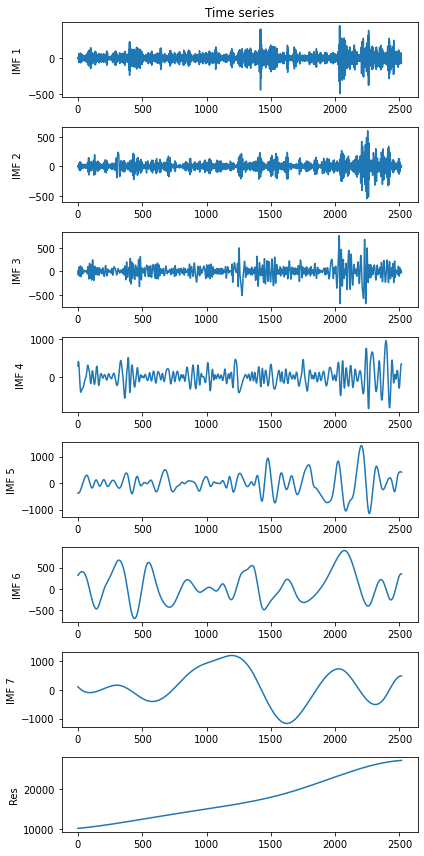

In [21]:
imfs, res = emd.get_imfs_and_residue()
vis = Visualisation()
vis.plot_imfs(imfs=imfs, residue=res, include_residue=True)
#vis.plot_instant_freq(imfs=imfs)
vis.show()

Create imf1, 2, 3, 4, 5, 6, 7 

In [22]:
imf1 = imfs[0,:]
imf2 = imfs[1,:]
imf3 = imfs[2,:]
imf4 = imfs[3,:]
imf5 = imfs[4,:]
imf6 = imfs[5,:]
imf7 = imfs[6,:]

## Data splitting

Data splitting: the last 150 samples will be used as the test set. For the rest, the first 80% will be the training set, and the last 20% will be the validation set.

In [23]:
index_length = len(imf1)
imf1_test = imf1[(index_length-150) : index_length] # the start index is included, but the end index is not included.
imf2_test = imf2[(index_length-150) : index_length] # 100 - 10 = 90, the last 10 element index should be from 90 to 99
imf3_test = imf3[(index_length-150) : index_length] # the last 10 elements should be from 91 to 100.
imf4_test = imf4[(index_length-150) : index_length]
imf5_test = imf5[(index_length-150) : index_length]
imf6_test = imf6[(index_length-150) : index_length]
imf7_test = imf7[(index_length-150) : index_length]
res_test = res[(index_length-150) : index_length]

In [24]:
train_start_index = 0
train_end_index = round(0.8 * (index_length - 150))

In [25]:
imf1_train = imf1[0 : train_end_index]
imf2_train = imf2[0 : train_end_index]
imf3_train = imf3[0 : train_end_index]
imf4_train = imf4[0 : train_end_index]
imf5_train = imf5[0 : train_end_index]
imf6_train = imf6[0 : train_end_index]
imf7_train = imf7[0 : train_end_index]
res_train = res[0 : train_end_index]

In [26]:
validation_start_index = train_end_index
validation_end_index = index_length-150


In [27]:
imf1_validation = imf1[validation_start_index:validation_end_index]
imf2_validation = imf2[validation_start_index:validation_end_index]
imf3_validation = imf3[validation_start_index:validation_end_index]
imf4_validation = imf4[validation_start_index:validation_end_index]
imf5_validation = imf5[validation_start_index:validation_end_index]
imf6_validation = imf6[validation_start_index:validation_end_index]
imf7_validation = imf7[validation_start_index:validation_end_index]
res_validation = res[validation_start_index:validation_end_index]

## Normalization (min-max)

Calculate the maximum and the minimum of the training set sequence, then use them to normalize the training set, the validation set, and the test set.

In [28]:
# normalization of imf1_train, imf1_validation, and imf1_test
imf1_train_norm = (imf1_train - min(imf1_train))/(max(imf1_train) - min(imf1_train))
imf1_validation_norm = (imf1_validation - min(imf1_train))/(max(imf1_train) - min(imf1_train))
imf1_test_norm = (imf1_test - min(imf1_train))/(max(imf1_train) - min(imf1_train))

In [29]:
# normalization of imf2_train, imf2_validation, and imf2_test
imf2_train_norm = (imf2_train - min(imf2_train))/(max(imf2_train) - min(imf2_train))
imf2_validation_norm = (imf2_validation - min(imf2_train))/(max(imf2_train) - min(imf2_train))
imf2_test_norm = (imf2_test - min(imf2_train))/(max(imf2_train) - min(imf2_train))

In [30]:
# normalization of imf3_train, imf3_validation, and imf3_test
imf3_train_norm = (imf3_train - min(imf3_train))/(max(imf3_train) - min(imf3_train))
imf3_validation_norm = (imf3_validation - min(imf3_train))/(max(imf3_train) - min(imf3_train))
imf3_test_norm = (imf3_test - min(imf3_train))/(max(imf3_train) - min(imf3_train))

In [31]:
# normalization of imf4_train, imf4_validation, and imf4_test
imf4_train_norm = (imf4_train - min(imf4_train))/(max(imf4_train) - min(imf4_train))
imf4_validation_norm = (imf4_validation - min(imf4_train))/(max(imf4_train) - min(imf4_train))
imf4_test_norm = (imf4_test - min(imf4_train))/(max(imf4_train) - min(imf4_train))

In [32]:
# normalization of imf5_train, imf5_validation, and imf5_test
imf5_train_norm = (imf5_train - min(imf5_train))/(max(imf5_train) - min(imf5_train))
imf5_validation_norm = (imf5_validation - min(imf5_train))/(max(imf5_train) - min(imf5_train))
imf5_test_norm = (imf5_test - min(imf5_train))/(max(imf5_train) - min(imf5_train))

In [33]:
# normalization of imf6_train, imf6_validation, and imf6_test
imf6_train_norm = (imf6_train - min(imf6_train))/(max(imf6_train) - min(imf6_train))
imf6_validation_norm = (imf6_validation - min(imf6_train))/(max(imf6_train) - min(imf6_train))
imf6_test_norm = (imf6_test - min(imf6_train))/(max(imf6_train) - min(imf6_train))

In [34]:
# normalization of imf7_train, imf7_validation, and imf7_test
imf7_train_norm = (imf7_train - min(imf7_train))/(max(imf7_train) - min(imf7_train))
imf7_validation_norm = (imf7_validation - min(imf7_train))/(max(imf7_train) - min(imf7_train))
imf7_test_norm = (imf7_test - min(imf7_train))/(max(imf7_train) - min(imf7_train))

In [35]:
# normalization of res_train, res_validation, and res_test
res_train_norm = (res_train - min(res_train))/(max(res_train) - min(res_train))
res_validation_norm = (res_validation - min(res_train))/(max(res_train) - min(res_train))
res_test_norm = (res_test - min(res_train))/(max(res_train) - min(res_train))

## Build the input sequences. Each sequence contains 250 elements. 

Combine train_norm, validation_norm, and test_norm.

In [36]:
# Could combine sequence together, then produce the datasets.
imf1_norm = np.concatenate((imf1_train_norm, imf1_validation_norm, imf1_test_norm), axis = 0)
imf2_norm = np.concatenate((imf2_train_norm, imf2_validation_norm, imf2_test_norm), axis = 0)
imf3_norm = np.concatenate((imf3_train_norm, imf3_validation_norm, imf3_test_norm), axis = 0)
imf4_norm = np.concatenate((imf4_train_norm, imf4_validation_norm, imf4_test_norm), axis = 0)
imf5_norm = np.concatenate((imf5_train_norm, imf5_validation_norm, imf5_test_norm), axis = 0)
imf6_norm = np.concatenate((imf6_train_norm, imf6_validation_norm, imf6_test_norm), axis = 0)
imf7_norm = np.concatenate((imf7_train_norm, imf7_validation_norm, imf7_test_norm), axis = 0)
res_norm = np.concatenate((res_train_norm, res_validation_norm, res_test_norm), axis = 0)

For one time series, the input of the model is a sequence with 250 time steps. The output should be a prediction on the next time step. Based on this principle, generate input dataset and target dataset.

Input shape

3+D tensor with shape: batch_shape + (steps, input_dim)

Output shape

3+D tensor with shape: batch_shape + (new_steps, filters) steps value might have changed due to padding or strides.

Returns

A tensor of rank 3 representing activation(conv1d(inputs, kernel) + bias).

The input and output of the forecasting model should be array.

In [37]:
# the width of one sequence, could be tuned as one hyper-parameter
sequence_width = 250  
imf1_norm_X = np.zeros((index_length-sequence_width, sequence_width),dtype=float)
imf1_norm_Y = np.zeros((index_length-sequence_width, sequence_width),dtype=float)
for i in range(index_length-sequence_width):
  imf1_norm_X[i] = imf1_norm[i:i+sequence_width]
  imf1_norm_Y[i] = imf1_norm[i+1:i+sequence_width+1]

# split the norm_X, and norm_Y to get the corresponding training set, validation set, and test set.
# The last 150 samples is test set.
imf1_norm_X_train = imf1_norm_X[0 : train_end_index-sequence_width]
imf1_norm_Y_train = imf1_norm_Y[0 : train_end_index-sequence_width]
imf1_norm_X_validation = imf1_norm_X[train_end_index-sequence_width : validation_end_index-sequence_width]
imf1_norm_Y_validation = imf1_norm_Y[train_end_index-sequence_width : validation_end_index-sequence_width]
imf1_norm_X_test = imf1_norm_X[validation_end_index-sequence_width : index_length-sequence_width]
imf1_norm_Y_test = imf1_norm_Y[validation_end_index-sequence_width : index_length-sequence_width]

# Reshape x to shape (nb_of_examples, nb_of_features, 1).
imf1_norm_X_train = imf1_norm_X_train.reshape(imf1_norm_X_train.shape[0], sequence_width, 1)
imf1_norm_Y_train = imf1_norm_Y_train.reshape(imf1_norm_Y_train.shape[0], sequence_width, 1)
imf1_norm_X_validation = imf1_norm_X_validation.reshape(imf1_norm_X_validation.shape[0], sequence_width, 1)
imf1_norm_Y_validation = imf1_norm_Y_validation.reshape(imf1_norm_Y_validation.shape[0], sequence_width, 1)
imf1_norm_X_test = imf1_norm_X_test.reshape(imf1_norm_X_test.shape[0], sequence_width, 1)
imf1_norm_Y_test = imf1_norm_Y_test.reshape(imf1_norm_Y_test.shape[0], sequence_width, 1)

In [38]:
# imf2

imf2_norm_X = np.zeros((index_length-sequence_width, sequence_width),dtype=float)
imf2_norm_Y = np.zeros((index_length-sequence_width, sequence_width),dtype=float)
for i in range(index_length-sequence_width):
  imf2_norm_X[i] = imf2_norm[i:i+sequence_width]
  imf2_norm_Y[i] = imf2_norm[i+1:i+sequence_width+1]

# split the norm_X, and norm_Y to get the corresponding training set, validation set, and test set.
# The last 150 samples is test set.
imf2_norm_X_train = imf2_norm_X[0 : train_end_index-sequence_width]
imf2_norm_Y_train = imf2_norm_Y[0 : train_end_index-sequence_width]
imf2_norm_X_validation = imf2_norm_X[train_end_index-sequence_width : validation_end_index-sequence_width]
imf2_norm_Y_validation = imf2_norm_Y[train_end_index-sequence_width : validation_end_index-sequence_width]
imf2_norm_X_test = imf2_norm_X[validation_end_index-sequence_width : index_length-sequence_width]
imf2_norm_Y_test = imf2_norm_Y[validation_end_index-sequence_width : index_length-sequence_width]

# Reshape x to shape (nb_of_examples, nb_of_features, 1).
imf2_norm_X_train = imf2_norm_X_train.reshape(imf2_norm_X_train.shape[0], sequence_width, 1)
imf2_norm_Y_train = imf2_norm_Y_train.reshape(imf2_norm_Y_train.shape[0], sequence_width, 1)
imf2_norm_X_validation = imf2_norm_X_validation.reshape(imf2_norm_X_validation.shape[0], sequence_width, 1)
imf2_norm_Y_validation = imf2_norm_Y_validation.reshape(imf2_norm_Y_validation.shape[0], sequence_width, 1)
imf2_norm_X_test = imf2_norm_X_test.reshape(imf2_norm_X_test.shape[0], sequence_width, 1)
imf2_norm_Y_test = imf2_norm_Y_test.reshape(imf2_norm_Y_test.shape[0], sequence_width, 1)

In [39]:
# imf3

imf3_norm_X = np.zeros((index_length-sequence_width, sequence_width),dtype=float)
imf3_norm_Y = np.zeros((index_length-sequence_width, sequence_width),dtype=float)
for i in range(index_length-sequence_width):
  imf3_norm_X[i] = imf3_norm[i:i+sequence_width]
  imf3_norm_Y[i] = imf3_norm[i+1:i+sequence_width+1]

# split the norm_X, and norm_Y to get the corresponding training set, validation set, and test set.
# The last 150 samples is test set.
imf3_norm_X_train = imf3_norm_X[0 : train_end_index-sequence_width]
imf3_norm_Y_train = imf3_norm_Y[0 : train_end_index-sequence_width]
imf3_norm_X_validation = imf3_norm_X[train_end_index-sequence_width : validation_end_index-sequence_width]
imf3_norm_Y_validation = imf3_norm_Y[train_end_index-sequence_width : validation_end_index-sequence_width]
imf3_norm_X_test = imf3_norm_X[validation_end_index-sequence_width : index_length-sequence_width]
imf3_norm_Y_test = imf3_norm_Y[validation_end_index-sequence_width : index_length-sequence_width]

# Reshape x to shape (nb_of_examples, nb_of_features, 1).
imf3_norm_X_train = imf3_norm_X_train.reshape(imf3_norm_X_train.shape[0], sequence_width, 1)
imf3_norm_Y_train = imf3_norm_Y_train.reshape(imf3_norm_Y_train.shape[0], sequence_width, 1)
imf3_norm_X_validation = imf3_norm_X_validation.reshape(imf3_norm_X_validation.shape[0], sequence_width, 1)
imf3_norm_Y_validation = imf3_norm_Y_validation.reshape(imf3_norm_Y_validation.shape[0], sequence_width, 1)
imf3_norm_X_test = imf3_norm_X_test.reshape(imf3_norm_X_test.shape[0], sequence_width, 1)
imf3_norm_Y_test = imf3_norm_Y_test.reshape(imf3_norm_Y_test.shape[0], sequence_width, 1)

In [40]:
# imf4

imf4_norm_X = np.zeros((index_length-sequence_width, sequence_width),dtype=float)
imf4_norm_Y = np.zeros((index_length-sequence_width, sequence_width),dtype=float)
for i in range(index_length-sequence_width):
  imf4_norm_X[i] = imf4_norm[i:i+sequence_width]
  imf4_norm_Y[i] = imf4_norm[i+1:i+sequence_width+1]

# split the norm_X, and norm_Y to get the corresponding training set, validation set, and test set.
# The last 150 samples is test set.
imf4_norm_X_train = imf4_norm_X[0 : train_end_index-sequence_width]
imf4_norm_Y_train = imf4_norm_Y[0 : train_end_index-sequence_width]
imf4_norm_X_validation = imf4_norm_X[train_end_index-sequence_width : validation_end_index-sequence_width]
imf4_norm_Y_validation = imf4_norm_Y[train_end_index-sequence_width : validation_end_index-sequence_width]
imf4_norm_X_test = imf4_norm_X[validation_end_index-sequence_width : index_length-sequence_width]
imf4_norm_Y_test = imf4_norm_Y[validation_end_index-sequence_width : index_length-sequence_width]

# Reshape x to shape (nb_of_examples, nb_of_features, 1).
imf4_norm_X_train = imf4_norm_X_train.reshape(imf4_norm_X_train.shape[0], sequence_width, 1)
imf4_norm_Y_train = imf4_norm_Y_train.reshape(imf4_norm_Y_train.shape[0], sequence_width, 1)
imf4_norm_X_validation = imf4_norm_X_validation.reshape(imf4_norm_X_validation.shape[0], sequence_width, 1)
imf4_norm_Y_validation = imf4_norm_Y_validation.reshape(imf4_norm_Y_validation.shape[0], sequence_width, 1)
imf4_norm_X_test = imf4_norm_X_test.reshape(imf4_norm_X_test.shape[0], sequence_width, 1)
imf4_norm_Y_test = imf4_norm_Y_test.reshape(imf4_norm_Y_test.shape[0], sequence_width, 1)

In [41]:
# imf5
 
imf5_norm_X = np.zeros((index_length-sequence_width, sequence_width),dtype=float)
imf5_norm_Y = np.zeros((index_length-sequence_width, sequence_width),dtype=float)
for i in range(index_length-sequence_width):
  imf5_norm_X[i] = imf5_norm[i:i+sequence_width]
  imf5_norm_Y[i] = imf5_norm[i+1:i+sequence_width+1]

# split the norm_X, and norm_Y to get the corresponding training set, validation set, and test set.
# The last 150 samples is test set.
imf5_norm_X_train = imf5_norm_X[0 : train_end_index-sequence_width]
imf5_norm_Y_train = imf5_norm_Y[0 : train_end_index-sequence_width]
imf5_norm_X_validation = imf5_norm_X[train_end_index-sequence_width : validation_end_index-sequence_width]
imf5_norm_Y_validation = imf5_norm_Y[train_end_index-sequence_width : validation_end_index-sequence_width]
imf5_norm_X_test = imf5_norm_X[validation_end_index-sequence_width : index_length-sequence_width]
imf5_norm_Y_test = imf5_norm_Y[validation_end_index-sequence_width : index_length-sequence_width]

# Reshape x to shape (nb_of_examples, nb_of_features, 1).
imf5_norm_X_train = imf5_norm_X_train.reshape(imf5_norm_X_train.shape[0], sequence_width, 1)
imf5_norm_Y_train = imf5_norm_Y_train.reshape(imf5_norm_Y_train.shape[0], sequence_width, 1)
imf5_norm_X_validation = imf5_norm_X_validation.reshape(imf5_norm_X_validation.shape[0], sequence_width, 1)
imf5_norm_Y_validation = imf5_norm_Y_validation.reshape(imf5_norm_Y_validation.shape[0], sequence_width, 1)
imf5_norm_X_test = imf5_norm_X_test.reshape(imf5_norm_X_test.shape[0], sequence_width, 1)
imf5_norm_Y_test = imf5_norm_Y_test.reshape(imf5_norm_Y_test.shape[0], sequence_width, 1)

In [42]:
# imf6
 
imf6_norm_X = np.zeros((index_length-sequence_width, sequence_width),dtype=float)
imf6_norm_Y = np.zeros((index_length-sequence_width, sequence_width),dtype=float)
for i in range(index_length-sequence_width):
  imf6_norm_X[i] = imf6_norm[i:i+sequence_width]
  imf6_norm_Y[i] = imf6_norm[i+1:i+sequence_width+1]

# split the norm_X, and norm_Y to get the corresponding training set, validation set, and test set.
# The last 150 samples is test set.
imf6_norm_X_train = imf6_norm_X[0 : train_end_index-sequence_width]
imf6_norm_Y_train = imf6_norm_Y[0 : train_end_index-sequence_width]
imf6_norm_X_validation = imf6_norm_X[train_end_index-sequence_width : validation_end_index-sequence_width]
imf6_norm_Y_validation = imf6_norm_Y[train_end_index-sequence_width : validation_end_index-sequence_width]
imf6_norm_X_test = imf6_norm_X[validation_end_index-sequence_width : index_length-sequence_width]
imf6_norm_Y_test = imf6_norm_Y[validation_end_index-sequence_width : index_length-sequence_width]

# Reshape x to shape (nb_of_examples, nb_of_features, 1).
imf6_norm_X_train = imf6_norm_X_train.reshape(imf6_norm_X_train.shape[0], sequence_width, 1)
imf6_norm_Y_train = imf6_norm_Y_train.reshape(imf6_norm_Y_train.shape[0], sequence_width, 1)
imf6_norm_X_validation = imf6_norm_X_validation.reshape(imf6_norm_X_validation.shape[0], sequence_width, 1)
imf6_norm_Y_validation = imf6_norm_Y_validation.reshape(imf6_norm_Y_validation.shape[0], sequence_width, 1)
imf6_norm_X_test = imf6_norm_X_test.reshape(imf6_norm_X_test.shape[0], sequence_width, 1)
imf6_norm_Y_test = imf6_norm_Y_test.reshape(imf6_norm_Y_test.shape[0], sequence_width, 1)

In [43]:
# imf7

imf7_norm_X = np.zeros((index_length-sequence_width, sequence_width),dtype=float)
imf7_norm_Y = np.zeros((index_length-sequence_width, sequence_width),dtype=float)
for i in range(index_length-sequence_width):
  imf7_norm_X[i] = imf7_norm[i:i+sequence_width]
  imf7_norm_Y[i] = imf7_norm[i+1:i+sequence_width+1]

# split the norm_X, and norm_Y to get the corresponding training set, validation set, and test set.
# The last 150 samples is test set.
imf7_norm_X_train = imf7_norm_X[0 : train_end_index-sequence_width]
imf7_norm_Y_train = imf7_norm_Y[0 : train_end_index-sequence_width]
imf7_norm_X_validation = imf7_norm_X[train_end_index-sequence_width : validation_end_index-sequence_width]
imf7_norm_Y_validation = imf7_norm_Y[train_end_index-sequence_width : validation_end_index-sequence_width]
imf7_norm_X_test = imf7_norm_X[validation_end_index-sequence_width : index_length-sequence_width]
imf7_norm_Y_test = imf7_norm_Y[validation_end_index-sequence_width : index_length-sequence_width]

# Reshape x to shape (nb_of_examples, nb_of_features, 1).
imf7_norm_X_train = imf7_norm_X_train.reshape(imf7_norm_X_train.shape[0], sequence_width, 1)
imf7_norm_Y_train = imf7_norm_Y_train.reshape(imf7_norm_Y_train.shape[0], sequence_width, 1)
imf7_norm_X_validation = imf7_norm_X_validation.reshape(imf7_norm_X_validation.shape[0], sequence_width, 1)
imf7_norm_Y_validation = imf7_norm_Y_validation.reshape(imf7_norm_Y_validation.shape[0], sequence_width, 1)
imf7_norm_X_test = imf7_norm_X_test.reshape(imf7_norm_X_test.shape[0], sequence_width, 1)
imf7_norm_Y_test = imf7_norm_Y_test.reshape(imf7_norm_Y_test.shape[0], sequence_width, 1)

In [44]:
# residual
 
res_norm_X = np.zeros((index_length-sequence_width, sequence_width),dtype=float)
res_norm_Y = np.zeros((index_length-sequence_width, sequence_width),dtype=float)
for i in range(index_length-sequence_width):
  res_norm_X[i] = res_norm[i:i+sequence_width]
  res_norm_Y[i] = res_norm[i+1:i+sequence_width+1]

# split the norm_X, and norm_Y to get the corresponding training set, validation set, and test set.
# The last 150 samples is test set.
res_norm_X_train = res_norm_X[0 : train_end_index-sequence_width]
res_norm_Y_train = res_norm_Y[0 : train_end_index-sequence_width]
res_norm_X_validation = res_norm_X[train_end_index-sequence_width : validation_end_index-sequence_width]
res_norm_Y_validation = res_norm_Y[train_end_index-sequence_width : validation_end_index-sequence_width]
res_norm_X_test = res_norm_X[validation_end_index-sequence_width : index_length-sequence_width]
res_norm_Y_test = res_norm_Y[validation_end_index-sequence_width : index_length-sequence_width]

# Reshape x to shape (nb_of_examples, nb_of_features, 1).
res_norm_X_train = res_norm_X_train.reshape(res_norm_X_train.shape[0], sequence_width, 1)
res_norm_Y_train = res_norm_Y_train.reshape(res_norm_Y_train.shape[0], sequence_width, 1)
res_norm_X_validation = res_norm_X_validation.reshape(res_norm_X_validation.shape[0], sequence_width, 1)
res_norm_Y_validation = res_norm_Y_validation.reshape(res_norm_Y_validation.shape[0], sequence_width, 1)
res_norm_X_test = res_norm_X_test.reshape(res_norm_X_test.shape[0], sequence_width, 1)
res_norm_Y_test = res_norm_Y_test.reshape(res_norm_Y_test.shape[0], sequence_width, 1)

## Build the forecasing model

Define a function, namely EMD_Capsule_LSTM, which creates the forecasting model.

In [45]:
# Input to base learner
inputs = keras.Input(shape=(sequence_width, 1), name="sequence_input")

In [46]:
inputs.shape

TensorShape([None, 250, 1])

In [47]:
# Convolution 1d layer padding = 'same' or 'causal', activation='tanh' or 'none' 
x_1 = layers.Conv1D(512, 2, strides=1, padding = 'causal', activation= 'tanh')(inputs)

In [48]:
x_1.shape

TensorShape([None, 250, 512])

In [49]:
# group convolution 1d layer replacing the max pooling layer for creating capsules.
x_2 = layers.Conv1D(512, 2, strides=1, padding = 'causal', groups = 64, activation='tanh')(x_1)  # sqaushing funcion transfers the elements in capsules to positive values, which will lead to a forecast being only positive.

In [50]:
x_2.shape

TensorShape([None, 250, 512])

In [51]:
# build capsules
x_3 = layers.Reshape((sequence_width,64,8))(x_2)

In [52]:
x_3.shape

TensorShape([None, 250, 64, 8])

In [53]:
# ConvLSTM1D layer (the hidden unit # has not been settled. In ConvLSTM, the fully connected layer is replaced by filter, so the filter size should be the hyper-parameter )
x_4 = layers.ConvLSTM1D(64, kernel_size= 2, padding = 'same', data_format = 'channels_first', return_sequences=True)(x_3)

In [54]:
x_4.shape

TensorShape([None, 250, 64, 8])

In [55]:
x_5 = layers.Reshape((sequence_width,512))(x_4)

In [56]:
x_5.shape

TensorShape([None, 250, 512])

In [57]:
# Attention mechanism
attention_1 = layers.Dense(1, activation = 'tanh')(x_4)

In [58]:
attention_1.shape

TensorShape([None, 250, 64, 1])

In [59]:
attention_2 = layers.Reshape((sequence_width,64))(attention_1)

In [60]:
attention_2.shape

TensorShape([None, 250, 64])

In [61]:
attention_3 = layers.Dense(1, activation = 'tanh')(attention_2)

In [62]:
attention_3.shape

TensorShape([None, 250, 1])

In [63]:
attention_4 = layers.Reshape((sequence_width,))(attention_3)

In [64]:
attention_4.shape

TensorShape([None, 250])

In [65]:
attention_5 = layers.Activation('softmax')(attention_4)

In [66]:
attention_5.shape

TensorShape([None, 250])

In [67]:
attention_6 = layers.Reshape((sequence_width,1))(attention_5)

In [68]:
attention_6.shape

TensorShape([None, 250, 1])

In [69]:
x_6 = layers.Multiply()([x_5,attention_6])

In [70]:
x_6.shape

TensorShape([None, 250, 512])

In [71]:
x_7 = layers.Reshape((sequence_width,64,8))(x_6)

In [72]:
x_7.shape

TensorShape([None, 250, 64, 8])

In [73]:
x_8 = layers.Lambda(lambda x: tf.math.reduce_sum(x, axis = 1))(x_7)

In [74]:
x_8.shape

TensorShape([None, 64, 8])

In [75]:
x_9 = layers.Dense(1)(x_8)

In [76]:
x_9.shape

TensorShape([None, 64, 1])

In [77]:
x_10 = layers.Reshape((64,))(x_9)

In [78]:
x_10.shape

TensorShape([None, 64])

In [79]:
output = layers.Dense(1)(x_10)

In [80]:
output.shape

TensorShape([None, 1])

In [81]:
# Build the model 'Capsule_ConvLSTM_Attention'
model_imf1 = keras.Model(inputs=inputs, outputs=output, name="model_imf1")
model_imf2 = keras.Model(inputs=inputs, outputs=output, name="model_imf2")
model_imf3 = keras.Model(inputs=inputs, outputs=output, name="model_imf3")
model_imf4 = keras.Model(inputs=inputs, outputs=output, name="model_imf4")
model_imf5 = keras.Model(inputs=inputs, outputs=output, name="model_imf5")
model_imf6 = keras.Model(inputs=inputs, outputs=output, name="model_imf6")
model_imf7 = keras.Model(inputs=inputs, outputs=output, name="model_imf7")
model_res = keras.Model(inputs=inputs, outputs=output, name="model_res")


In [82]:
model_imf1.summary()

Model: "model_imf1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 sequence_input (InputLayer)    [(None, 250, 1)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 250, 512)     1536        ['sequence_input[0][0]']         
                                                                                                  
 conv1d_1 (Conv1D)              (None, 250, 512)     8704        ['conv1d[0][0]']                 
                                                                                                  
 reshape (Reshape)              (None, 250, 64, 8)   0           ['conv1d_1[0][0]']               
                                                                                         

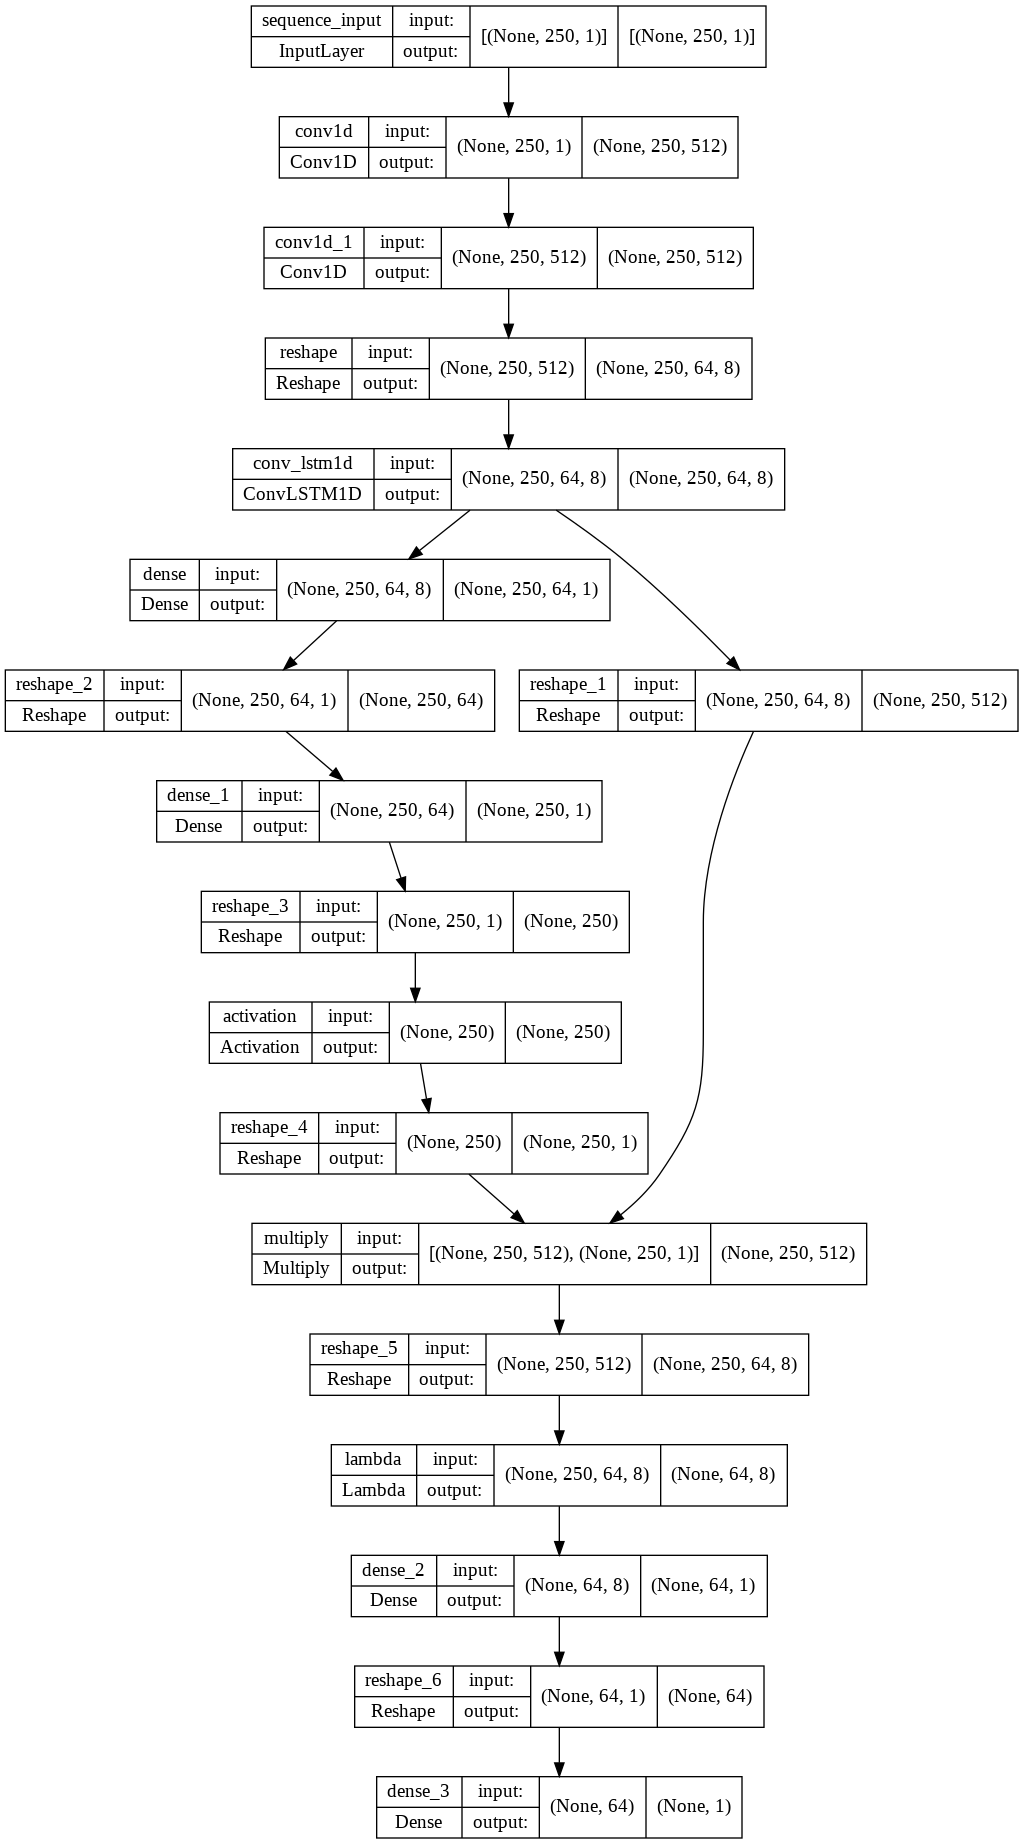

In [83]:
keras.utils.plot_model(model_imf1, "Capsule_ConvLSTM_Attention.png",show_shapes=True)

In [111]:
# setting optimizer 
adam_1 = tf.keras.optimizers.Adam(
                                    learning_rate=0.00008,
                                    beta_1=0.9,
                                    beta_2=0.999,
                                    epsilon=1e-07,
                                    amsgrad=False)

In [112]:
# compile model
model_imf1.compile(optimizer= adam_1,  loss=tf.keras.losses.MeanAbsoluteError(), metrics=[tf.keras.metrics.RootMeanSquaredError()])
model_imf2.compile(optimizer=adam_1,  loss=tf.keras.losses.MeanAbsoluteError(), metrics=[tf.keras.metrics.RootMeanSquaredError()])
model_imf3.compile(optimizer=adam_1,  loss=tf.keras.losses.MeanAbsoluteError(), metrics=[tf.keras.metrics.RootMeanSquaredError()])
model_imf4.compile(optimizer=adam_1,  loss=tf.keras.losses.MeanAbsoluteError(), metrics=[tf.keras.metrics.RootMeanSquaredError()])
model_imf5.compile(optimizer=adam_1,  loss=tf.keras.losses.MeanAbsoluteError(), metrics=[tf.keras.metrics.RootMeanSquaredError()])
model_imf6.compile(optimizer=adam_1,  loss=tf.keras.losses.MeanAbsoluteError(), metrics=[tf.keras.metrics.RootMeanSquaredError()])
model_imf7.compile(optimizer=adam_1,  loss=tf.keras.losses.MeanAbsoluteError(), metrics=[tf.keras.metrics.RootMeanSquaredError()])
model_res.compile(optimizer=adam_1,  loss=tf.keras.losses.MeanAbsoluteError(), metrics=[tf.keras.metrics.RootMeanSquaredError()])
    

In [91]:
# fit the model

imf1_training_history = model_imf1.fit(imf1_norm_X_train, imf1_norm_Y_train, validation_data=(imf1_norm_X_validation, imf1_norm_Y_validation), epochs=10, batch_size=200, verbose=1)

Epoch 1/10
9/9 [==============================] - 33s 3s/step - loss: 0.4779 - root_mean_squared_error: 0.4844 - val_loss: 0.4384 - val_root_mean_squared_error: 0.4533
Epoch 2/10
9/9 [==============================] - 25s 3s/step - loss: 0.4021 - root_mean_squared_error: 0.4101 - val_loss: 0.3426 - val_root_mean_squared_error: 0.3602
Epoch 3/10
9/9 [==============================] - 24s 3s/step - loss: 0.2807 - root_mean_squared_error: 0.2938 - val_loss: 0.1810 - val_root_mean_squared_error: 0.2066
Epoch 4/10
9/9 [==============================] - 23s 3s/step - loss: 0.0991 - root_mean_squared_error: 0.1236 - val_loss: 0.1193 - val_root_mean_squared_error: 0.1497
Epoch 5/10
9/9 [==============================] - 24s 3s/step - loss: 0.0837 - root_mean_squared_error: 0.1049 - val_loss: 0.0811 - val_root_mean_squared_error: 0.1193
Epoch 6/10
9/9 [==============================] - 26s 3s/step - loss: 0.0672 - root_mean_squared_error: 0.0873 - val_loss: 0.0837 - val_root_mean_squared_error:

In [92]:
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-18ee6943-4e13-e2e8-a9d8-087401e2a050)


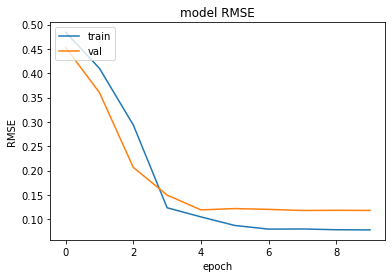

In [109]:
plt.plot(imf1_training_history.history['root_mean_squared_error'])
plt.plot(imf1_training_history.history['val_root_mean_squared_error'])
plt.title('model RMSE')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [94]:
# make a prediction on imf1
imf1_norm_Y_hat = model_imf1.predict(imf1_norm_X_test)

In [95]:
imf1_norm_Y_hat.shape

(150, 1)

In [96]:
imf1_norm_Y_hat = np.reshape(imf1_norm_Y_hat, (150,))

In [97]:
imf1_norm_Y_hat.shape

(150,)

In [98]:
imf1_test_norm.shape

(150,)

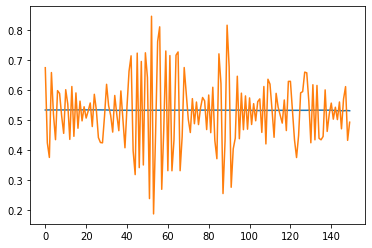

In [99]:
plt.plot(imf1_norm_Y_hat)
plt.plot(imf1_test_norm)
plt.show()

In [100]:
# reverse the norm prediction
imf1_Y_hat = imf1_norm_Y_hat * (max(imf1_train) - min(imf1_train)) + min(imf1_train)


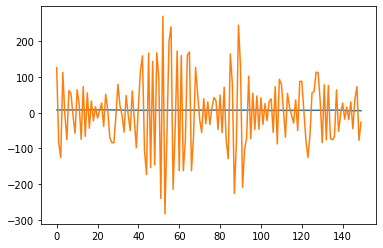

In [101]:
plt.plot(imf1_Y_hat)
plt.plot(imf1_test)
plt.show()

In [102]:
imf1_Y_hat.shape

(150,)

In [103]:
imf1_test.shape

(150,)

In [104]:
rmse_1 = np.mean(np.sqrt(np.mean((imf1_Y_hat - imf1_test) ** 2)))

In [105]:
rmse_1

97.50020148289953

In [113]:
# train model_imf2
imf2_training_history = model_imf2.fit(imf2_norm_X_train, imf2_norm_Y_train, validation_data=(imf2_norm_X_validation, imf2_norm_Y_validation), epochs=10, batch_size=200, verbose=1)

Epoch 1/10
9/9 [==============================] - 30s 3s/step - loss: 0.1067 - root_mean_squared_error: 0.1437 - val_loss: 0.1662 - val_root_mean_squared_error: 0.2408
Epoch 2/10
9/9 [==============================] - 25s 3s/step - loss: 0.1065 - root_mean_squared_error: 0.1435 - val_loss: 0.1660 - val_root_mean_squared_error: 0.2408
Epoch 3/10
9/9 [==============================] - 24s 3s/step - loss: 0.1065 - root_mean_squared_error: 0.1435 - val_loss: 0.1659 - val_root_mean_squared_error: 0.2408
Epoch 4/10
9/9 [==============================] - 24s 3s/step - loss: 0.1064 - root_mean_squared_error: 0.1434 - val_loss: 0.1658 - val_root_mean_squared_error: 0.2408
Epoch 5/10
9/9 [==============================] - 23s 3s/step - loss: 0.1064 - root_mean_squared_error: 0.1434 - val_loss: 0.1658 - val_root_mean_squared_error: 0.2408
Epoch 6/10
9/9 [==============================] - 27s 3s/step - loss: 0.1064 - root_mean_squared_error: 0.1434 - val_loss: 0.1658 - val_root_mean_squared_error:

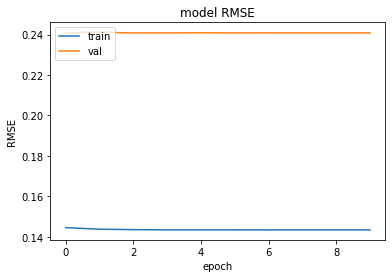

In [110]:
plt.plot(imf2_training_history.history['root_mean_squared_error'])
plt.plot(imf2_training_history.history['val_root_mean_squared_error'])
plt.title('model RMSE')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [142]:
# make a prediction on imf2
imf2_norm_Y_hat = model_imf2.predict(imf2_norm_X_test)

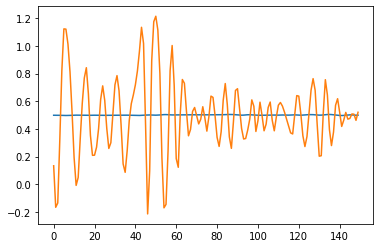

In [143]:
plt.plot(imf2_norm_Y_hat)
plt.plot(imf2_test_norm)
plt.show()

In [144]:
# reverse the norm prediction
imf2_Y_hat = imf2_norm_Y_hat * (max(imf2_train) - min(imf2_train)) + min(imf2_train)

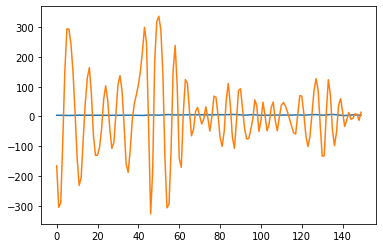

In [145]:
plt.plot(imf2_Y_hat)
plt.plot(imf2_test)
plt.show()